# Clasificación

'mpg' predecir el país de origen de un coche.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('mpg')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.isnull().sum() # alternative: missingno

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [6]:
median = df['horsepower'].median()
median

93.5

In [7]:
df['horsepower'] = df['horsepower'].fillna(median)

In [8]:
df.isnull().sum() 

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

<Axes: xlabel='mpg', ylabel='Count'>

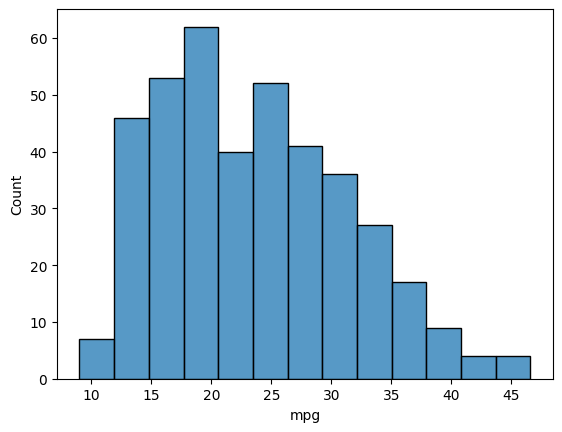

In [9]:
#EDAs
sns.histplot(data=df, x='mpg')

array([[<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'displacement'}>],
       [<Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>],
       [<Axes: title={'center': 'model_year'}>, <Axes: >, <Axes: >]],
      dtype=object)

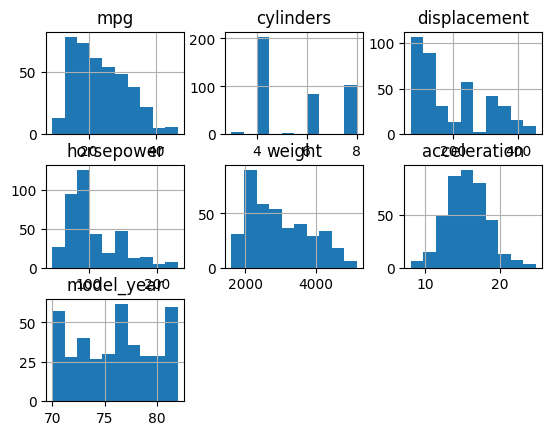

In [10]:
df.hist()

<Axes: xlabel='mpg'>

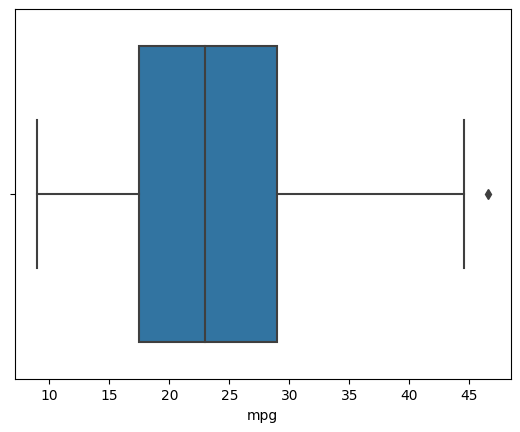

In [11]:
sns.boxplot(data=df, x='mpg')

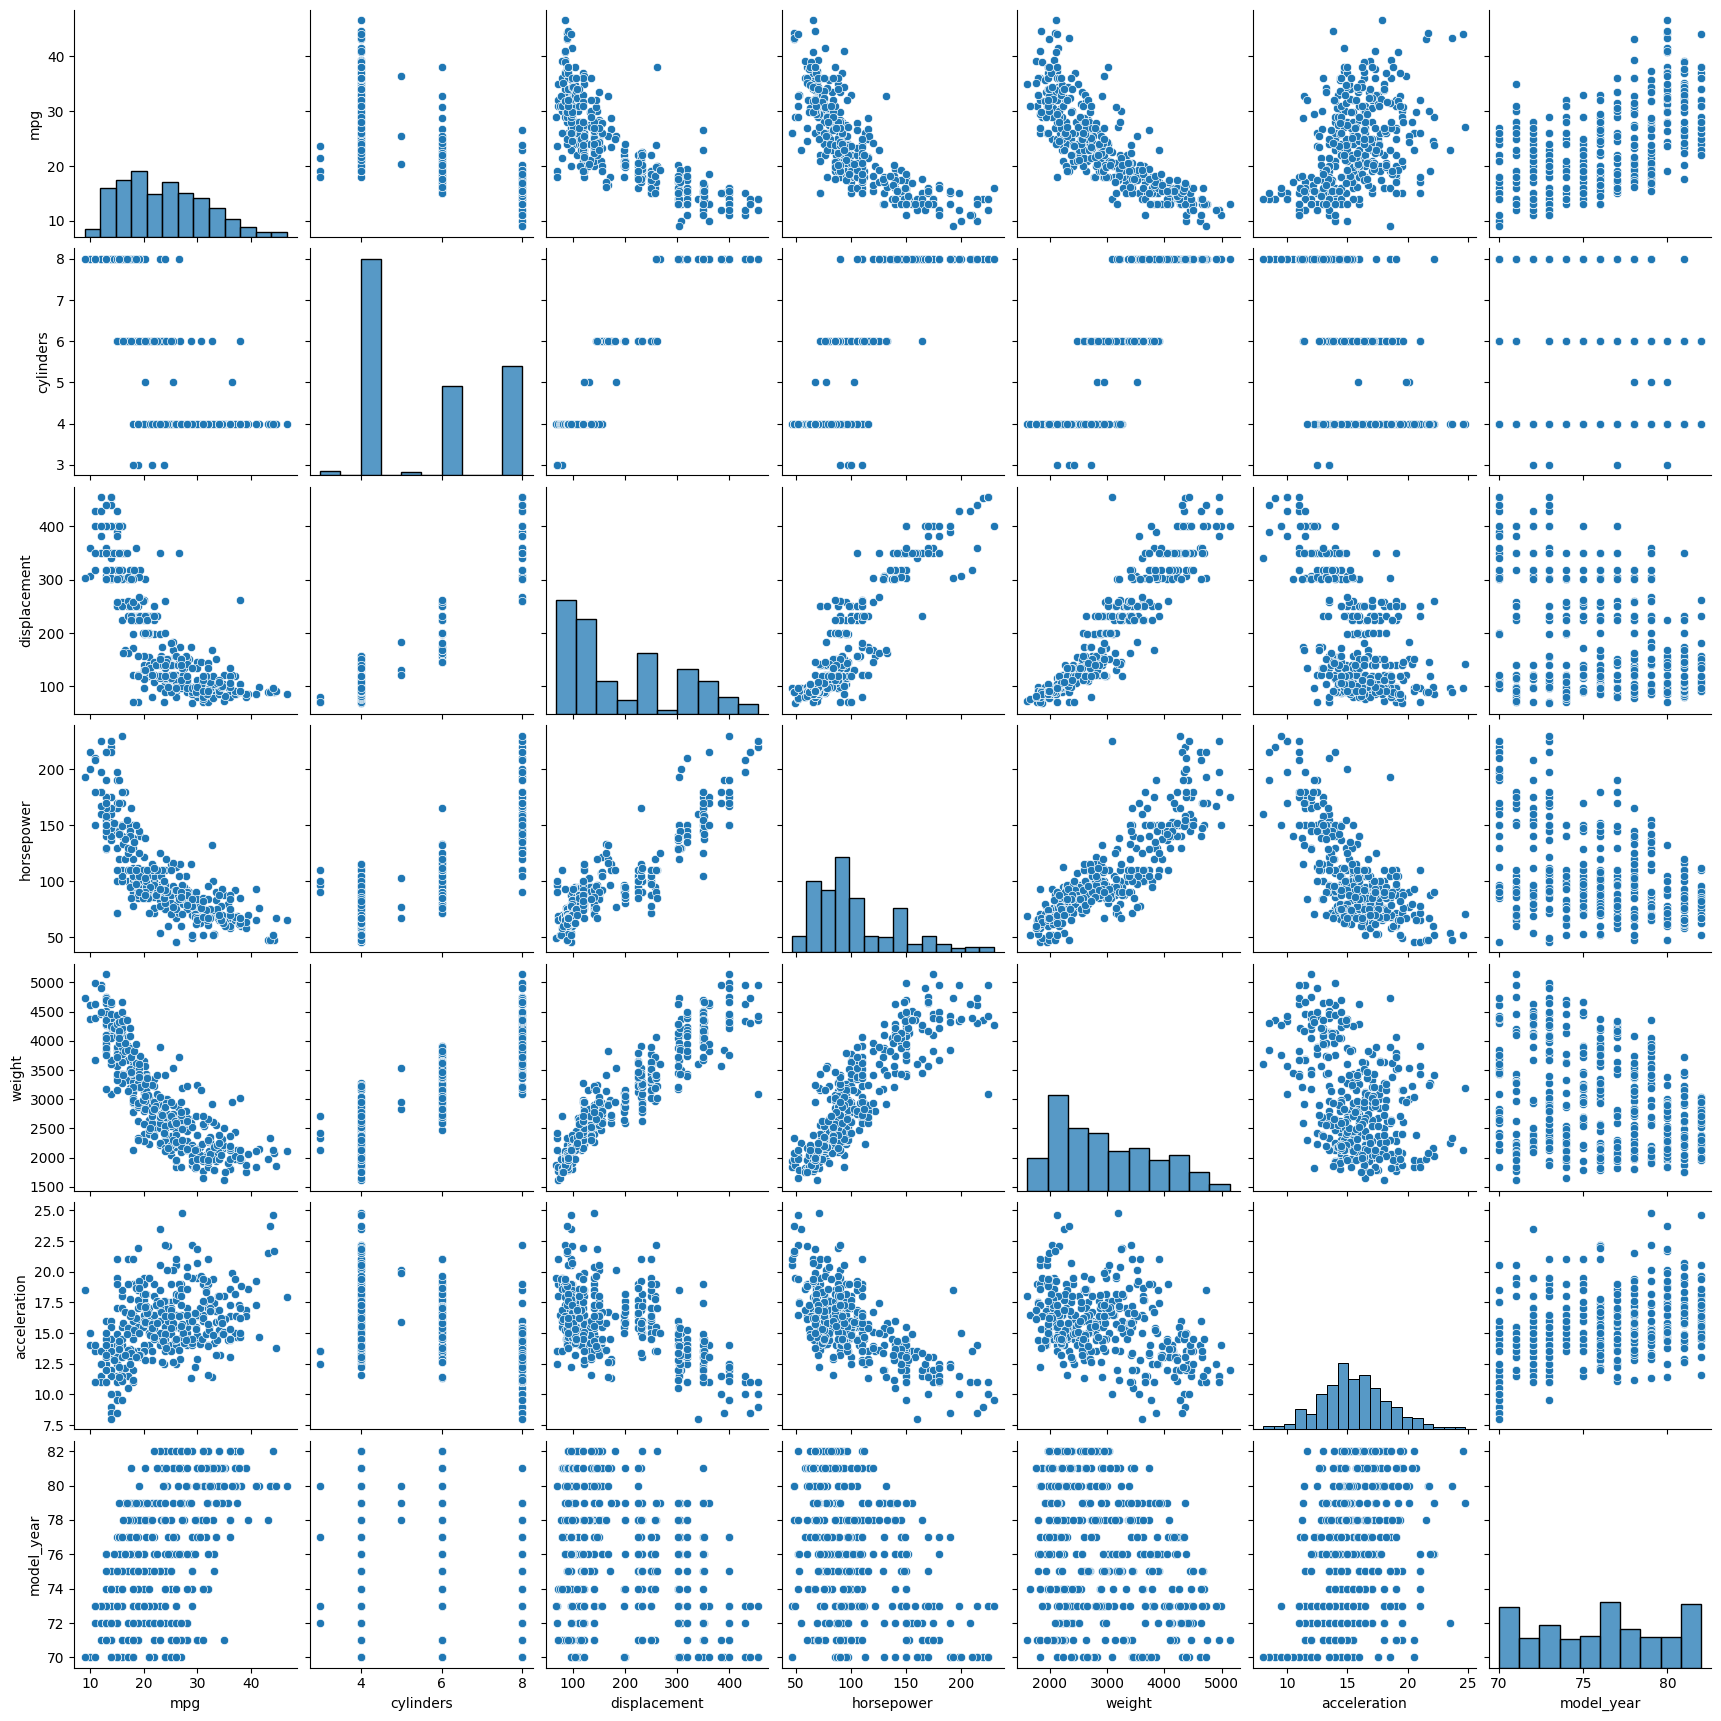

In [12]:
# sns.pairplot(df.sample(500))
sns.pairplot(df)

<Axes: xlabel='horsepower', ylabel='weight'>

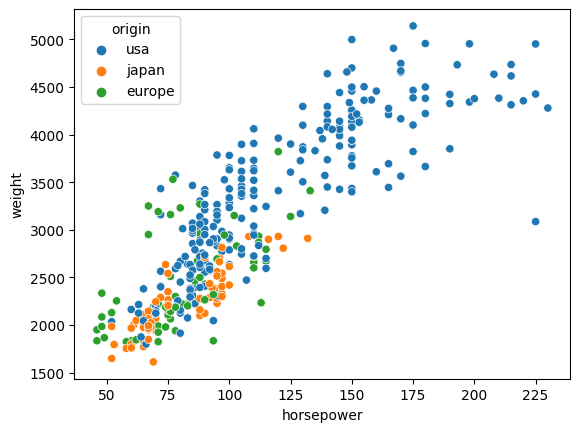

In [13]:
sns.scatterplot(data=df, x='horsepower', y ='weight', hue='origin')

In [14]:
# df = sns.load_dataset('mpg')
# df['name'].str.split(' ')[0]

In [15]:
# df_pivot = df.pivot_table(index="month", columns="usa", values="mpg")
# df_pivot.head()

In [16]:
# Borrar columna Name:
df.drop('name', axis=1, inplace=True)

In [17]:
df.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa


In [18]:
df['origin'].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [19]:
df['origin_int'] = df['origin'].map({
    'usa': 0, 
    'japan': 1,
    'europe': 2
})
df.tail(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,origin_int
393,27.0,4,140.0,86.0,2790,15.6,82,usa,0
394,44.0,4,97.0,52.0,2130,24.6,82,europe,2
395,32.0,4,135.0,84.0,2295,11.6,82,usa,0
396,28.0,4,120.0,79.0,2625,18.6,82,usa,0
397,31.0,4,119.0,82.0,2720,19.4,82,usa,0


In [20]:
X = df.drop(['origin', 'origin_int'], axis=1)
X.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70


In [21]:
y = df['origin']
y

0         usa
1         usa
2         usa
3         usa
4         usa
        ...  
393       usa
394    europe
395       usa
396       usa
397       usa
Name: origin, Length: 398, dtype: object

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler() # escala los datos de 0 a 1
# fit_transform: calcula y transforma los datos
X_train_scaled = scaler.fit_transform(X_train) 
# transform: solo transforma utilizando los cálculos obtenidos en train para que se haga 
# una prediccion sobre datos transformados de la misma manera que los datos con los que se entrenó
X_test_scaled = scaler.transform(X_test) 

In [24]:
df_results = pd.DataFrame(columns=['model_name', 'accuracy', 'f1_score'])

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score


model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      europe       0.54      0.50      0.52        14
       japan       0.57      0.62      0.59        13
         usa       0.89      0.89      0.89        53

    accuracy                           0.78        80
   macro avg       0.67      0.67      0.67        80
weighted avg       0.77      0.78      0.77        80



In [26]:
lr_accuracy = accuracy_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred, average='weighted')

In [27]:
lr_f1

0.774537037037037

In [28]:
new_row = {
    'model_name': 'LogisticRegression',
    'accuracy': lr_accuracy,
    'f1_score': lr_f1,
}
df_results.loc[df_results.shape[0]] = new_row
df_results.tail()

,model_name,accuracy,f1_score
0,LogisticRegression,0.775,0.774537


In [29]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      europe       0.56      0.64      0.60        14
       japan       0.41      0.54      0.47        13
         usa       0.91      0.81      0.86        53

    accuracy                           0.74        80
   macro avg       0.63      0.66      0.64        80
weighted avg       0.77      0.74      0.75        80



In [30]:
knn_accuracy = accuracy_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred, average='weighted')

In [31]:
new_row = {
    'model_name': 'KNeighborsClassifier',
    'accuracy': knn_accuracy,
    'f1_score': knn_f1,
}
df_results.loc[df_results.shape[0]] = new_row
df_results.tail()

,model_name,accuracy,f1_score
0,LogisticRegression,0.7750,0.774537
1,KNeighborsClassifier,0.7375,0.750583


In [32]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      europe       0.44      0.50      0.47        14
       japan       0.55      0.46      0.50        13
         usa       0.91      0.91      0.91        53

    accuracy                           0.76        80
   macro avg       0.63      0.62      0.62        80
weighted avg       0.77      0.76      0.76        80



In [33]:
# classification and regression trees (cart)
cart_accuracy = accuracy_score(y_test, y_pred)
cart_f1 = f1_score(y_test, y_pred, average='weighted')

In [34]:
new_row = {
    'model_name': 'DecisionTreeClassifier',
    'accuracy': cart_accuracy,
    'f1_score': cart_f1,
}
df_results.loc[df_results.shape[0]] = new_row
df_results.tail()

,model_name,accuracy,f1_score
0,LogisticRegression,0.7750,0.774537
1,KNeighborsClassifier,0.7375,0.750583
2,DecisionTreeClassifier,0.7625,0.762917


(0.7, 0.8)

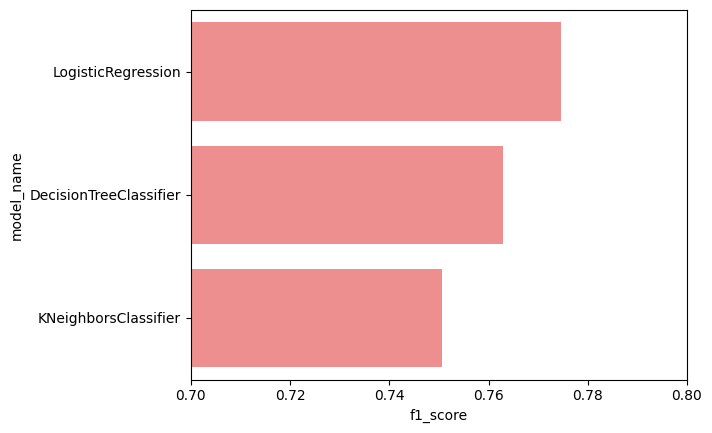

In [38]:
df_results = df_results.sort_values('f1_score', ascending=False)

sns.barplot(data=df_results, x='f1_score', y='model_name', color='red', alpha=0.5)

# sns.barplot(data=df_results, x='mae_test', y='model_name', color='green', alpha=0.5)
plt.xlim(0.7, 0.8)
#plt.grid()